## Earth's Atmospheric Composition: Computer Laboratory #3

Paul Palmer, University of Edinburgh (paul.palmer@ed.ac.uk)


### Contents:

The learning objectives of this lab are:
1. To look at real air quality data (in this example PM2.5 concentrations at two geographical locations). 
2. Apply some simple statistics to
<ul>
<li>learn a bit more about what drives observed variations of PM2.5;
<li>understand how to apply simple air quality violations.
</ul>
3. To understand how models can be (mis)used to relate air quality and human health.

This is a [Jupyter](https://www.jupyter.org "Jupyter's Homepage") notebook, which allows you to use the power of Python without much knowledge of the language.

**To run the code below:**
1. Click on the cell to select it.
2. Press CTRL+ENTER on your keyboard or press the play button () in the toolbar above.

### Exercise #1: Understanding observed variations of PM2.5 over India

All data are taken from http://openaq.org/. In this notebook we will explore some of the data collected from contrasting sites: Edinburgh, UK and Delhi, India.

A flashy real-time statistical summary of [Edinburgh](http://breathelife2030.org/city-data-page/?city=2566) and [Delhi](http://breathelife2030.org/city-data-page/?city=1262).

The plot below describes the raw data for PM2.5 (recall particulate matter with diameters of 2.5 microns and less) for Edinburgh and Delhi. Questions are below.

Text(0, 0.5, 'PM2.5 $\\mu$g/m$^3$')

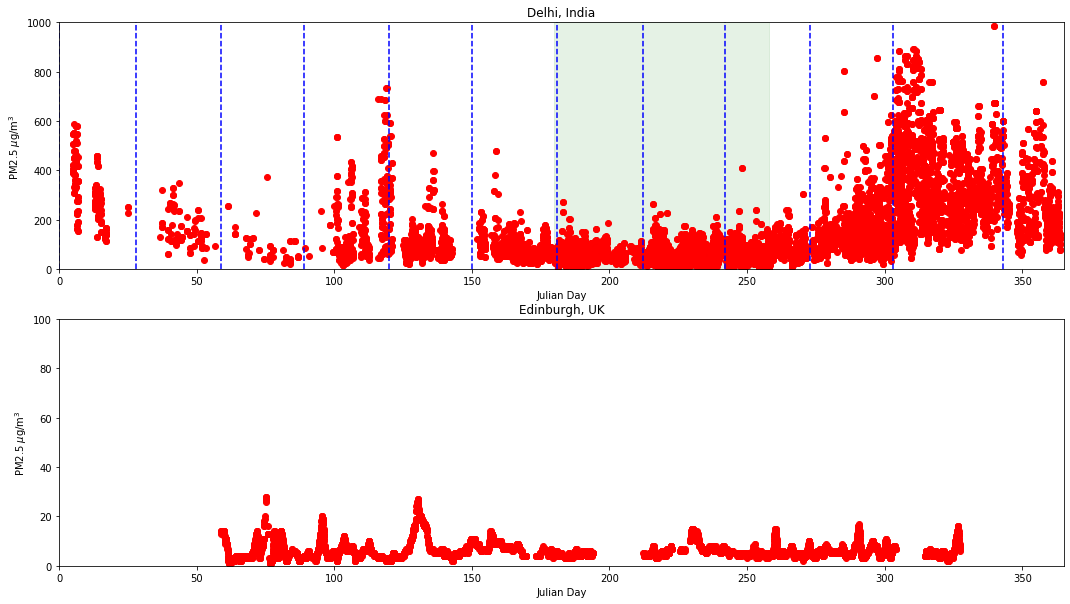

In [1]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

#================================
def readaqfile(InputFile):
    p = pd.read_csv(InputFile, encoding = "ISO-8859-1", header = 0)
    p = np.array(p)

    # pandas reads data as object type which makes plt.hist() dead and hence data conversion here (fei 02/03/2020).
    pm25 = p[:,6].astype(np.float)
    time = p[:,4]

    JulianDay = []
    Month     = []
    Hour      = []
    
    for ii in np.arange(len(time)):
    
        tmp = time[ii].split('T')
        
        tmp2 = tmp[1].split('+')
    
        timestring = tmp[0]+' '+tmp2[0]
    
        date_object = datetime.datetime.strptime(timestring,\
                                                 '%Y-%m-%d %H:%M:%S')
        tt = date_object.timetuple()
        
        Month.append(tt.tm_mon)
    
        Hour.append(tt.tm_hour)
    
        JulianDay.append(tt.tm_yday + \
                         (tt.tm_hour*3600 + tt.tm_min*60)/\
                         (24.*3600.))
    return pm25, JulianDay, Month, Hour
#================================


DelhiInputFile = '/jupyter/ppalmer/datafiles/delhi_pm2.5.csv'
delhipm25, delhilocaltime, delhimonth, delhihour = readaqfile(DelhiInputFile)

EdinburghInputFile = '/jupyter/ppalmer/datafiles/edinburgh_pm2.5.csv'
edinburghpm25, edinburghlocaltime, edinburghmonth, edinburghhour = readaqfile(EdinburghInputFile)

fig = plt.figure(figsize=(18,10))

plt.subplot(211)
plt.plot(delhilocaltime,delhipm25,'ro')
plt.xlim([0,365])
plt.ylim([0,1000])
plt.title('Delhi, India')
plt.xlabel('Julian Day')
plt.ylabel('PM2.5 $\mu$g/m$^3$')

plt.axvspan(180,258, alpha=0.1, color='green')

firstdaymonth = [0,28,59,89,120,150,181,212,242,273,303,343]

for ii in np.arange(len(firstdaymonth)): 
    plt.plot([firstdaymonth[ii],firstdaymonth[ii]],[0,1000],'b--')

plt.subplot(212)
plt.plot(edinburghlocaltime,edinburghpm25,'ro')
plt.xlim([0,365])
plt.ylim([0,100])
plt.title('Edinburgh, UK')
plt.xlabel('Julian Day')
plt.ylabel('PM2.5 $\mu$g/m$^3$')


#### Questions:
<ol>
<li> Given your knowledge of aerosols (sources, chemical transformations, etc) what processes do you think might control the observed variations of PM2.5 over Delhi and Edinburgh? For example, use Google to figure about why PM2.5 is so much high in winter than other months. Is it what you expected? 
    <ul>
        <li>Is it the same process that drives variation in Spring?
        <li>Why is it low during summer months? [Clue: the green shaded area.]   
    </ul>
<li> Why do you think that PM2.5 is so much larger over Delhi than the Edinburgh site?
</ol>

<u>Meteorological Resources:</u>
<ol>
<li>[Edinburgh](http://www.metoffice.gov.uk/public/weather/climate/gcvwqum6h)
<li>[Delhi](https://en.wikipedia.org/wiki/Climate_of_Delhi)
</ol>

### Exercise #2: Statistical analysis of observed variations of PM2.5

Below I have plotted the data shown above using a box and whiskers plot. If you haven't seen or used one of these plots before check out this figures (taken from BBC):

<img src = "http://www.bbc.co.uk/staticarchive/efbb442e599e8ed46c183917f8ffbd90cfc82cab.gif">

I have plotted the data in two different ways. Questions below.

(679,)


Text(0, 0.5, 'PM2.5 $\\mu$g/m$^3$')

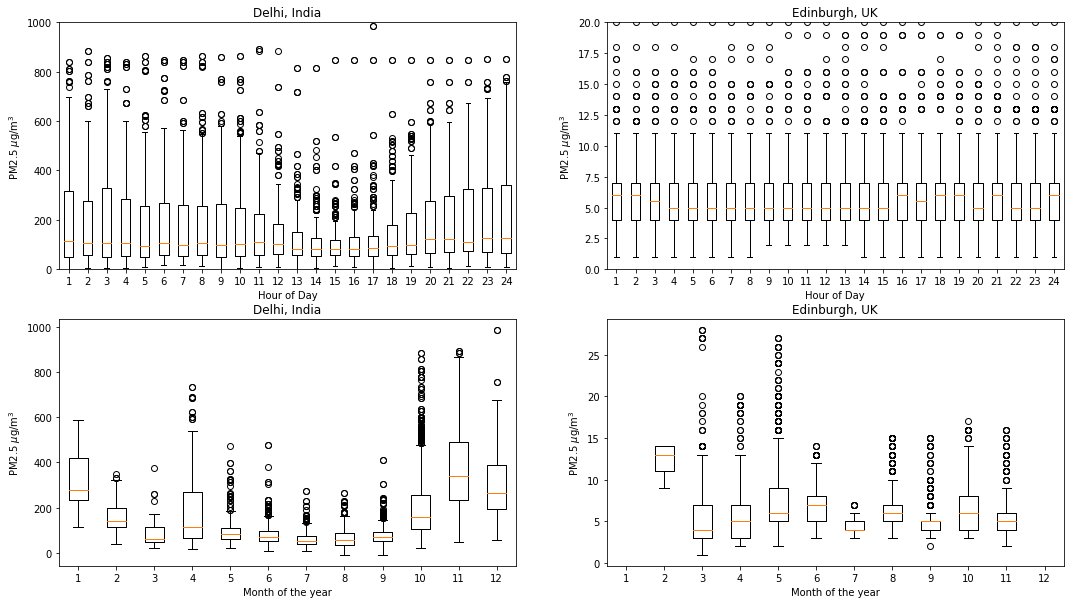

In [2]:
import matplotlib.pyplot as plt


def dailyboxandwhiskers(pm25file,dayfile):
    daystats = np.zeros([24,2000])
    daycount = np.zeros(24,dtype=int)

    for ii in np.arange(len(pm25file)):
        dayidx = dayfile[ii]-1
        daycount[dayidx] += 1
        cntidx = daycount[dayidx] - 1
        daystats[dayidx,cntidx] = pm25file[ii]

    masterlist = []
    for ii in np.arange(len(daycount)):
        maxidx = daycount[ii]-1
        data = daystats[ii,0:maxidx + 1]
        masterlist.append(data)
    return masterlist    
    
    
    

def monthboxandwhiskers(pm25file,monthfile):
    monstats = np.zeros([12,2000])
    moncount = np.zeros(12,dtype=int)

    for ii in np.arange(len(pm25file)):
        monidx = monthfile[ii]-1
        moncount[monidx] += 1
        cntidx = moncount[monidx] - 1
        monstats[monidx,cntidx] = pm25file[ii]
    
    masterlist = []
    for ii in np.arange(len(moncount)):
        maxidx = moncount[ii]-1
        data = monstats[ii,0:maxidx + 1]
        masterlist.append(data)
    return masterlist
        

fig = plt.figure(figsize=(18,10))

delhimonstats     = monthboxandwhiskers(delhipm25,delhimonth)       
edinburghmonstats = monthboxandwhiskers(edinburghpm25,edinburghmonth)  

print(np.shape(edinburghmonstats[3]))

delhidaystats     = dailyboxandwhiskers(delhipm25,delhihour)       
edinburghdaystats = dailyboxandwhiskers(edinburghpm25,edinburghhour)       


plt.subplot(221)
plt.boxplot(delhidaystats);
plt.title('Delhi, India')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 $\mu$g/m$^3$')
plt.ylim([0,1000])

plt.subplot(222)
plt.boxplot(edinburghdaystats);
plt.title('Edinburgh, UK')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 $\mu$g/m$^3$')
plt.ylim([0,20])

plt.subplot(223)
plt.boxplot(delhimonstats);
plt.title('Delhi, India')
plt.xlabel('Month of the year')
plt.ylabel('PM2.5 $\mu$g/m$^3$')

plt.subplot(224)
plt.boxplot(edinburghmonstats);
plt.title('Edinburgh, UK')
plt.xlabel('Month of the year')
plt.ylabel('PM2.5 $\mu$g/m$^3$')


<b>Questions</b>:
<ol>
<li> By plotting the data to observe the diurnal variation what have we learnt?
<li> By plotting the data as monthly averages what have we learnt?
</ol>

### Exercise #3: What drives observed variations of PM2.5 over Beijing?

Aerosol mass spectrometers can distinguish the constituents of PM2.5. These constituents provide clues about the sources that drive daily and seasonal variations in PM2.5.

Below is some data collected over Beijing from [Professor Qi Chen](http://scholar.pku.edu.cn/qichen/people/qi-chen-%E9%99%88%E7%90%A6 "Qi Chen's Homepage") and her group at Peking University.

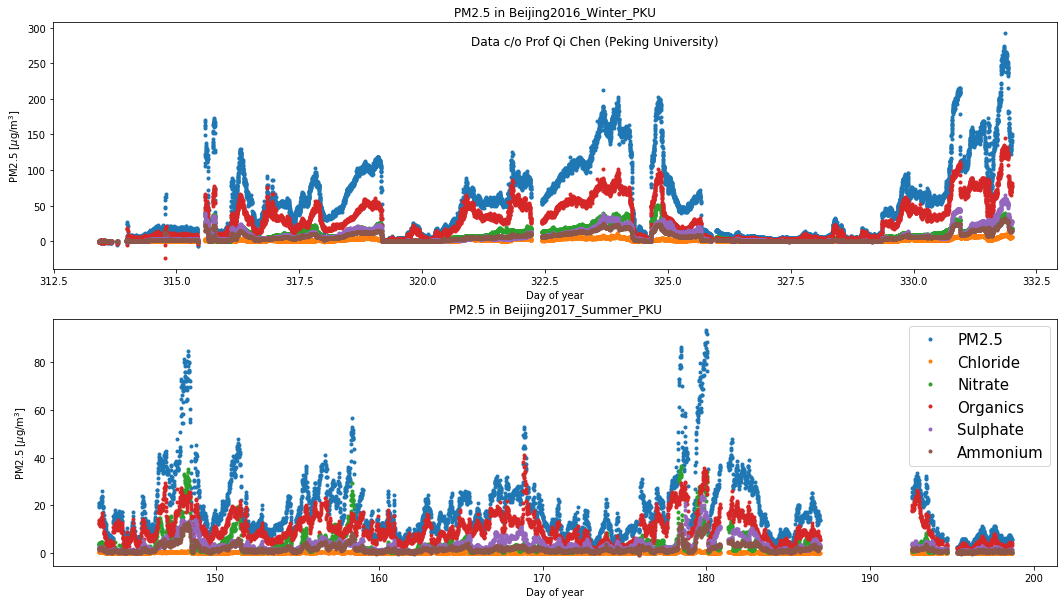

In [3]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

#================================
def readaqfile(InputFile,sheet_name):
    p = pd.read_excel(InputFile, header = 3, sheet_name = sheet_name)
    p = np.array(p)

    chloride = p[:,1]
    nitrate  = p[:,2]
    organics = p[:,3]
    sulphate = p[:,4]
    ammonium = p[:,5]

    time = p[:,0]

    JulianDay = []
    
    for ii in np.arange(len(time)):
        JulianDay.append(time[ii].dayofyear + (time[ii].hour + (time[ii].minute)/60.)/24.) 

    return chloride, nitrate, organics, sulphate, ammonium, JulianDay
#================================

PKUInputFile = '/jupyter/ppalmer/datafiles/Yan_PKU_2016-2017Data.xlsx'

fig = plt.figure(figsize=(18,10))

#========================
# Winter 2016 data
#========================
plt.subplot(211)

SheetName = '2016_Winter_PKU'
chloride, nitrate, organics, sulphate, ammonium, jday = readaqfile(PKUInputFile,SheetName)

sumpm25 = chloride+nitrate+organics+sulphate+ammonium

plt.plot(jday,sumpm25,'o',markersize=3,label='PM2.5')
plt.plot(jday,chloride,'o',markersize=3,label='Chloride')
plt.plot(jday,nitrate,'o',markersize=3,label = 'Nitrate')
plt.plot(jday,organics,'o',markersize=3,label='Organics')
plt.plot(jday,sulphate,'o',markersize=3,label='Sulphate')
plt.plot(jday,ammonium,'o',markersize=3,label='Ammonium')
plt.ylabel('PM2.5 [$\mu$g/m$^3$]')
plt.xlabel('Day of year')
plt.text(321,275, r'Data c/o Prof Qi Chen (Peking University)', size='large')
plt.title('PM2.5 in Beijing'+SheetName)

#========================
# Summer 2017 data
#========================
plt.subplot(212)

SheetName = '2017_Summer_PKU'
chloride, nitrate, organics, sulphate, ammonium, jday = readaqfile(PKUInputFile,SheetName)

sumpm25 = chloride+nitrate+organics+sulphate+ammonium

plt.plot(jday,sumpm25,'o',markersize=3,label='PM2.5')
plt.plot(jday,chloride,'o',markersize=3,label='Chloride')
plt.plot(jday,nitrate,'o',markersize=3,label = 'Nitrate')
plt.plot(jday,organics,'o',markersize=3,label='Organics')
plt.plot(jday,sulphate,'o',markersize=3,label='Sulphate')
plt.plot(jday,ammonium,'o',markersize=3,label='Ammonium')
plt.ylabel('PM2.5 [$\mu$g/m$^3$]')
plt.xlabel('Day of year')
plt.title('PM2.5 in Beijing'+SheetName)
plt.legend(prop={'size': 15})

#### Questions:
<ol>
<li> Given your knowledge of aerosols (sources, chemical transformations, etc) what processes do you think might control the observed variations of PM2.5 over Beijing during winter and summer months?
    <ul>
        <li> Think about the dominant components.
    </ul>
</ol>

### Exercise #4: PM2.5 Regulations

As you can see from the 
[EU](http://ec.europa.eu/environment/air/quality/standards.htm) and [US](https://www.epa.gov/particle-pollution-designations) regulating PM2.5 is still in its infancy compared to other air pollutants. 

Many regulatory agencies use an air quality index associated with PM2.5, where colours and warnings are associated with specific PM2.5 concentrations:
<img src="http://www.geos.ed.ac.uk/~ppalmer/jupyter/images/defra-aqi-pm2.5.png">

The plots below show frequency distributions and cumulative frequency distributions, which show the data in different ways. The cumulative frequency plot, in particular, provides a method of quantifying the fraction time of the year where PM2.5 is above a certain threshold. The two example cities are at the opposite ends of the spectrum. 

In [5]:
# from matplotlib import mlab

def plotpm25(standard):

    high = 50.
    
    fig = plt.figure(figsize=(18,10))

    n_bins = 100

    # Plot 1
    plt.subplot(221)
    n, bins, patches = plt.hist(delhipm25, n_bins, density=1,
                                histtype='step', cumulative=True)
    plt.grid(True)
    plt.ylim([0,1])
    plt.xlim([0,max(delhipm25)])
    plt.plot([standard,standard],[0,1],'g')
    plt.plot([high,high],[0,1],'r')
    plt.text(300, 0.4, r'UK AQ Standard PM2.5',color='g', size=14)
    plt.text(300, 0.2, r'Values to the right of this line are dangerous',color='r', size=14)


    # Plot 2
    plt.subplot(222)
    n, bins, patches = plt.hist(delhipm25, n_bins)
    plt.grid(True)
    plt.xlim([0,max(delhipm25)])
    plt.plot([standard,standard],[0,1200],'g')    
    mvalue = np.median(delhipm25)
    print(mvalue)
    plt.plot([mvalue,mvalue],[0,1200],'b--')
    plt.text(600, 200, r'Median value ='+str(mvalue),size=14)

    # Plot 3
    plt.subplot(223)
    en, ebins, epatches = plt.hist(edinburghpm25, n_bins, density=1,
                                histtype='step', cumulative=True)
    plt.grid(True)
    plt.ylim([0,1])
    plt.xlim([0,max(edinburghpm25)])
    plt.plot([standard,standard],[0,1],'g')


    # Plot 4
    plt.subplot(224)
    n, bins, patches = plt.hist(edinburghpm25, n_bins)
    plt.grid(True)
    plt.xlim([0,max(edinburghpm25)])
    plt.plot([standard,standard],[0,1200],'g') 
    mvalue = np.median(edinburghpm25)
    plt.text(10,800, r'Median value ='+str(mvalue),size=14)
    plt.plot([mvalue,mvalue],[0,1200],'b--')




interactive(plotpm25,standard=(0,50,5))



interactive(children=(IntSlider(value=25, description='standard', max=50, step=5), Output()), _dom_classes=('w…

### Exercise #5: Linking life expectancy with PM2.5 Exposure

We are now entering the world of epidemiological statistics. The calculation below, which you can play with, serves a purpose. 

The figure is taken from Pope III et al, ["Fine-particulate Air Pollution and Life Expectancy in the United States," The New England Journal of Medicine, 2009; 360:376-86.](http://www.nejm.org/doi/full/10.1056/NEJMsa0805646)

<img src="http://www.geos.ed.ac.uk/~ppalmer/jupyter/images/pope2009.png",width=500 style="float: left;"> What this figure suggests is that life expectancy has increased as PM2.5 concentrations have decreased. The linear model that the authors report is that for every 10$\mu$g/cm$^3$ decrease in PM2.5 there is an increase in life expectancy of 0.61$\pm$0.20 years.

The following calculation has been inspired (borrowed) from a [blog entry written by David Spiegelhalter](https://understandinguncertainty.org/how-many-hours-life-did-obama-lose-delhi) from the University of Cambridge. His example was focused on the number of hours President Barack Obama lost by inhalation of air laden with PM2.5 during his 3-day visit to Delhi. 

David used the reverse results from the Pope study to relate how an increase in PM2.5 would decrease your life expectancy. A 10$\mu$g/cm$^3$ increase would decrease your life by 0.61 years. Let's assume a [life expectancy of 78 years for Edinburgh](https://www.nrscotland.gov.uk/statistics-and-data/statistics/statistics-by-theme/life-expectancy/life-expectancy-in-scottish-areas/2012-2014) so that 0.61 years equates to 0.78% off your life expectancy.
Now let's spend a few days in Delhi where we know from the data PM2.5 is typically 99$\mu$g/cm$^3$...but can be much higher.

Below, I have written a small program that you can play with to explore that calculation.

In [6]:
def q10(medianlifeexpectancy,deltapm25,lengthofstay):
    # Change in life expectancy (hours)
    maxdays  = 365
    lechange = []
    for ii in np.arange(maxdays):
        lechange.append((deltapm25/10.) * (0.61/medianlifeexpectancy) * ii)
        
    lechangestay = lechange[int(lengthofstay-1)]
    
    plt.plot(np.arange(maxdays),lechange)
    plt.plot([lengthofstay,lengthofstay],[0,lechangestay],'g--')
    plt.plot([0,lengthofstay],[lechangestay,lechangestay],'g--')

    plt.text(10, 25, r'Reduction in life expectancy = '+str(int(lechangestay))+' days',color='g', size=14)
    plt.ylabel('Reduction in life expectancy [day]')
    plt.xlabel('Length of stay [days]')
    plt.xlim([0,365])

#medianlifeexpectancy = 78. # For Edinburgh
#deltapm25 = 99. - 5.       # Delhi median minus Edinburgh median
#ndays     = 7              # A short week trip

interactive(q10,medianlifeexpectancy=(50,100,5),deltapm25=(10,200,10),lengthofstay=(1,365,5))


interactive(children=(IntSlider(value=75, description='medianlifeexpectancy', min=50, step=5), IntSlider(value…

You can take a peak of [real-time PM2.5 concentrations around the world](http://aqicn.org/map/world/).

<b>Caveats</b>:
The Pope III study is implying causality but the data can only point to a relationship between PM2.5 and life expectancy, which may or may not involve a responsible third factor. I have (following David's calculation) related the results of a long-term study to a short-term exposure. It may well be possible that human health is not irreversibly damaged by short-term exposure to PM2.5. So this calculation also provides you with some idea of some of the pitfalls and difficulties associated with relating air quality and human health.

<b>Aside</b>:
PM2.5 is in the news a lot. The BBC put together a Figure based on data collected by Public Health England. Note the comment about uncertainties associated with the data.
<img src = "http://www.geos.ed.ac.uk/~ppalmer/jupyter/images/pm25death-bbc2016.png">